# About this Data: 

The dataset contains 6-folders: 5-folders having each category of images and one with the alien-test having the images of all categories. It also consist a csv file having the labels for the images in alien-test folder.
 <br> Dataset Source: Kaggle <br>
 Link : [Weather Classification](https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset/data) <br>
 Description: This dataset is designed for developing an autonomous weather classification system to enhance transportation safety under adverse conditions. It contains approximately 1500 labeled images from Flickr, Unsplash, and Pexels, under Creative Commons licenses, categorized into 5 distinct weather classes. The images vary in size and are stored in folders corresponding to their weather category, presenting a real-world challenge for researchers aiming to create classifiers using computer vision techniques. This effort marks a step towards leveraging intelligent transportation advancements for improving safety and security in varying weather conditions. <br>
 Each image have been rated for the weather condition on a scale of 0 to 4: <br>
0 - Cloudy <br>
1 - foggy <br>
2 - rainy <br>
3 - Shine <br>
4 - Sunrise. <br>

# Task

Perform weather Classification Using Transfer learning

Initial Steps on my end: <br>
organized the folders <br>
folder name: WeatherData <br>
folder path: "C:\Users\eesha\Downloads\WeatherData" <br>
test folder path: "C:\Users\eesha\Downloads\WeatherData\dataset\test" <br>
train folder path: "C:\Users\eesha\Downloads\WeatherData\dataset\train" <br>
note: test and train folders further contains the class folder of each of the labels

# Importing all Libraries 

In [136]:
!pip install opencv-python==4.6.0.66
import os
import cv2
import warnings
import random
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
from keras.models import load_model 
from keras.layers import Conv2D, MaxPool2D

# Uploading the data and Visualizing it

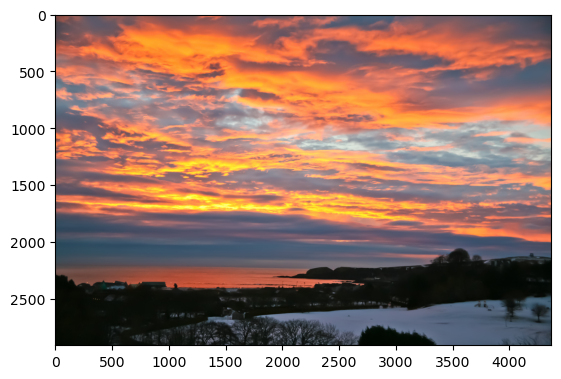

In [97]:
sunrise7 = cv2.imread("C:/Users/eesha/Downloads/WeatherData/dataset/train/sunrise/sunrise7.jpg")
sunrise7 = cv2.cvtColor(sunrise7,cv2.COLOR_BGR2RGB)
plt.imshow(sunrise7)

In [98]:
sunrise7.shape, sunrise7.max()

((2912, 4368, 3), 255)

# Data Augmentation 

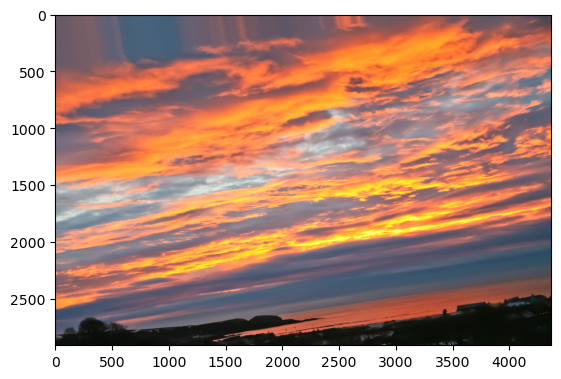

In [224]:
image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range=0.1, 
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.2,
                               horizontal_flip=True,
                              fill_mode='nearest') 
plt.imshow(image_gen.random_transform(sunrise7))

# Making Directories

In [227]:
batch = 16 #shouldn't exceed the number of images present in train folder
train_image_gen = image_gen.flow_from_directory("C:/Users/eesha/Downloads/WeatherData/dataset/test",
                                                target_size = (150,150),
                                                batch_size = batch, 
                                                class_mode = 'categorical')

Found 30 images belonging to 5 classes.


In [228]:
batch = 16 #exceed the number of images present in test folder
test_image_gen = image_gen.flow_from_directory("C:/Users/eesha/Downloads/WeatherData/dataset/train",
                                                target_size = (150,150),
                                                batch_size = batch, 
                                                class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [229]:
train_image_gen.class_indices
print(train_image_gen.class_indices)
label_map = {v: k for k, v in train_image_gen.class_indices.items()}
print(label_map)

{'Cloud': 0, 'foggy': 1, 'rain': 2, 'shine': 3, 'sunrise': 4}
{0: 'Cloud', 1: 'foggy', 2: 'rain', 3: 'shine', 4: 'sunrise'}


# Transfer Learning with VGG16

In [230]:
#my directories are defined:
train_dir = ("C:/Users/eesha/Downloads/WeatherData/dataset/train")
test_dir = ("C:/Users/eesha/Downloads/WeatherData/dataset/test")

In [231]:
#defining image dimensions
img_width, img_height = 150, 150
batch_size = 16

In [232]:
#data generators train, test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255) 
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 1500 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [233]:
#pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [252]:
#Freeze
for layer in base_model.layers:
    layer.trainable = False

In [235]:
#sequential model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [247]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=2,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/2
94/94 [==============================] - 38s 407ms/step - loss: 0.5196 - accuracy: 0.8153 - val_loss: 0.2252 - val_accuracy: 0.9000
Epoch 2/2
94/94 [==============================] - 38s 404ms/step - loss: 0.4260 - accuracy: 0.8533 - val_loss: 0.3747 - val_accuracy: 0.9000


In [248]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 360ms/step - loss: 0.3747 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


In [249]:
model.save('my_model.h5')

# Testing the models with Random images

In [250]:
image_files = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            image_files.append(os.path.join(root, file))
random_image_paths = random.sample(image_files, 5)
print(random_image_paths)

['C:/Users/eesha/Downloads/WeatherData/dataset/test\\foggy\\foggy_5.jpg', 'C:/Users/eesha/Downloads/WeatherData/dataset/test\\Cloud\\Cloud_2.jpg', 'C:/Users/eesha/Downloads/WeatherData/dataset/test\\sunrise\\sunrise_2.jpg', 'C:/Users/eesha/Downloads/WeatherData/dataset/test\\foggy\\foggy_9.jpg', 'C:/Users/eesha/Downloads/WeatherData/dataset/test\\shine\\shine_2.jpg']


# Making predictions

1/1 [==============================] - 0s 59ms/step


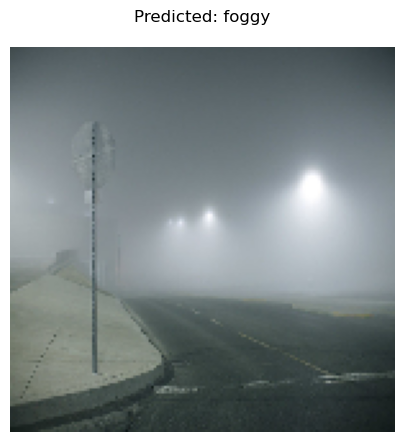

Image: C:/Users/eesha/Downloads/WeatherData/dataset/test\foggy\foggy_5.jpg
Predicted class: foggy
---------
1/1 [==============================] - 0s 53ms/step


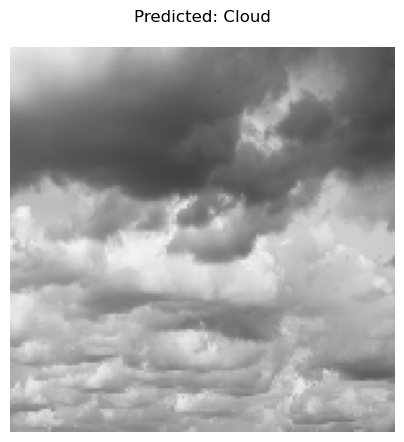

Image: C:/Users/eesha/Downloads/WeatherData/dataset/test\Cloud\Cloud_2.jpg
Predicted class: Cloud
---------
1/1 [==============================] - 0s 56ms/step


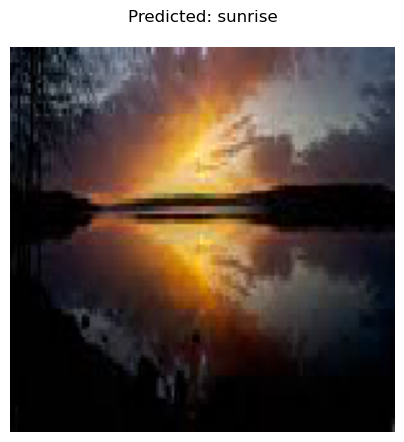

Image: C:/Users/eesha/Downloads/WeatherData/dataset/test\sunrise\sunrise_2.jpg
Predicted class: sunrise
---------
1/1 [==============================] - 0s 58ms/step


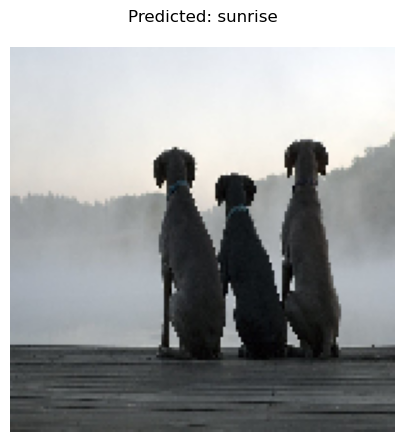

Image: C:/Users/eesha/Downloads/WeatherData/dataset/test\foggy\foggy_9.jpg
Predicted class: sunrise
---------
1/1 [==============================] - 0s 56ms/step


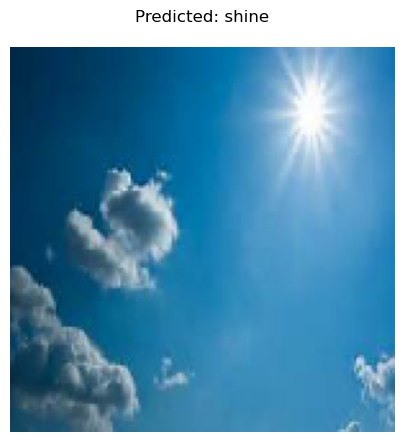

Image: C:/Users/eesha/Downloads/WeatherData/dataset/test\shine\shine_2.jpg
Predicted class: shine
---------


In [251]:
for img_path in random_image_paths:
    #Loading the image
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    # Preprocess the image
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array_expanded_dims / 255.0
    # Predicting classes
    predictions = model.predict(img_preprocessed)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class_name = label_map[predicted_class_index[0]]

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name}\n") 
    plt.axis('off')
    plt.show()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class_name}")
    print("---------")
    

# Learning Outcomes

-Model Accuracy: 89% <br>
-Our model predicted 4 out 5 classes correctly <br>
-It can further be improved using other Pretrained model and architetures as well as with further parameter tuning and batch predictions. 